In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model as lm

In [60]:
brm_weather = pd.read_csv("../generated/brm_hourly_weather.csv")
brm_weather

,day,hour,precipitation,temperature
0,2019-01-20,0,0.0,-3.8
1,2019-01-20,1,0.0,-3.2
2,2019-01-20,2,0.0,-3.6
3,2019-01-20,3,0.0,-4.5
4,2019-01-20,5,0.0,-4.9
...,...,...,...,...
8404,2020-01-20,19,0.0,4.4
8405,2020-01-20,20,0.0,4.7
8406,2020-01-20,21,0.0,4.7
8407,2020-01-20,22,0.0,4.7


In [61]:
brm_driven = pd.read_csv("../generated/brm_hourly_driven.csv")
brm_driven

,day,hour,trip_duration
0,2019-01-20,0,0 days 00:21:00.000000000
1,2019-01-20,1,0 days 00:34:00.000000000
2,2019-01-20,2,0 days 01:51:00.000000000
3,2019-01-20,3,0 days 00:18:00.000000000
4,2019-01-20,5,0 days 01:10:00.000000000
...,...,...,...
8404,2020-01-20,19,0 days 06:24:00.000000000
8405,2020-01-20,20,0 days 05:20:00.000000000
8406,2020-01-20,21,0 days 01:47:00.000000000
8407,2020-01-20,22,0 days 02:28:00.000000000


In [62]:
def merge_duration_and_weather(duration, weather):
    return duration.merge(how="left", left_on=["day", "hour"], right_on=["day","hour"], right=weather)

def timedelta_to_hours(timedelta_array):
    return timedelta_array.map(lambda x: x / pd.Timedelta("1 hour"))

def is_weekday(daytime):
    day_of_week = daytime.weekday()
    if day_of_week < 5:
        return False
    else:
        return True

def add_is_weekend(frame):
    frame["isWeekend"] = frame["day"].map(is_weekday)

In [63]:
brm = merge_duration_and_weather(brm_driven, brm_weather)

brm["day"] = pd.to_datetime(brm["day"])

brm["trip_duration"] = timedelta_to_hours(brm["trip_duration"])

brm

,day,hour,trip_duration,precipitation,temperature
0,2019-01-20,0,0.350000,0.0,-3.8
1,2019-01-20,1,0.566667,0.0,-3.2
2,2019-01-20,2,1.850000,0.0,-3.6
3,2019-01-20,3,0.300000,0.0,-4.5
4,2019-01-20,5,1.166667,0.0,-4.9
...,...,...,...,...,...
8404,2020-01-20,19,6.400000,0.0,4.4
8405,2020-01-20,20,5.333333,0.0,4.7
8406,2020-01-20,21,1.783333,0.0,4.7
8407,2020-01-20,22,2.466667,0.0,4.7


In [64]:
add_is_weekend(brm)
brm

,day,hour,trip_duration,precipitation,temperature,isWeekend
0,2019-01-20,0,0.350000,0.0,-3.8,0
1,2019-01-20,1,0.566667,0.0,-3.2,0
2,2019-01-20,2,1.850000,0.0,-3.6,0
3,2019-01-20,3,0.300000,0.0,-4.5,0
4,2019-01-20,5,1.166667,0.0,-4.9,0
...,...,...,...,...,...,...
8404,2020-01-20,19,6.400000,0.0,4.4,1
8405,2020-01-20,20,5.333333,0.0,4.7,1
8406,2020-01-20,21,1.783333,0.0,4.7,1
8407,2020-01-20,22,2.466667,0.0,4.7,1


In [65]:
#define predicting value
y = brm["trip_duration"]


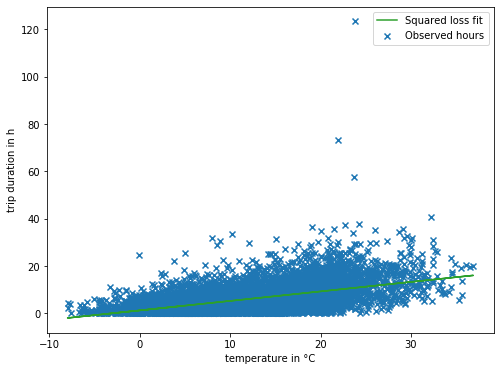

In [66]:
X = brm["temperature"].values.reshape(-1, 1)

brm_model = lm.LinearRegression()

brm_model.fit(X, y)

predict = brm_model.predict(X)

# plot resulzts
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker="x")
plt.xlabel("temperature in °C")
plt.ylabel("trip duration in h")
plt.plot(X, predict, c='C2')
plt.legend(['Squared loss fit','Observed hours'])

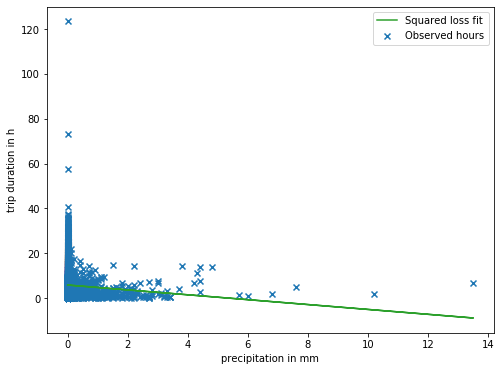

In [67]:
X = brm["precipitation"].values.reshape(-1, 1)

brm_model = lm.LinearRegression()

brm_model.fit(X, y)

predict = brm_model.predict(X)

# plot resulzts
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker="x")
plt.xlabel("precipitation in mm")
plt.ylabel("trip duration in h")
plt.plot(X, predict, c='C2')
plt.legend(['Squared loss fit','Observed hours'])

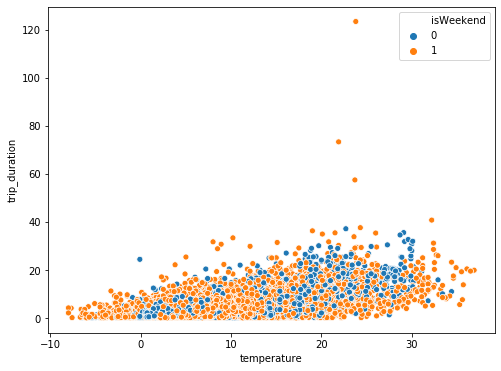

In [70]:
plt.figure(figsize = (8,6))

sns.scatterplot(x=brm["temperature"], y=y, hue=brm["isWeekend"])
plt.show()


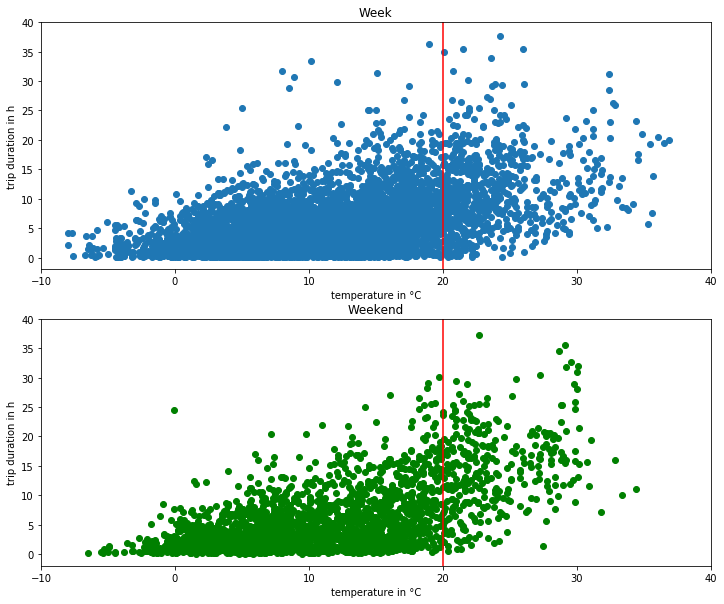

In [113]:
X = brm[brm["isWeekend"] == True]["temperature"]
y = brm[brm["isWeekend"] == True]["trip_duration"]

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title("Week")
plt.ylim(-2,40)
plt.xlim(-10,40)
plt.xlabel("temperature in °C")
plt.ylabel("trip duration in h")
plt.scatter(X, y)
plt.axvline(20, c="r")

X = brm[brm["isWeekend"] == False]["temperature"]
y = brm[brm["isWeekend"] == False]["trip_duration"]

plt.subplot(2,1,2)
plt.title("Weekend")
plt.ylim(-2,40)
plt.xlim(-10,40)
plt.xlabel("temperature in °C")
plt.ylabel("trip duration in h")
plt.scatter(X, y, c="g")
plt.axvline(20, c="r")



In [ ]:
X = brm[["temperature", "isWeekday"]]

brm_model_weekday = lm.LinearRegression()
brm_model_weekday.fit(X, y)


